1. KNN Regression: y column is life, X column is everything else. Please include in comments on whether the Region column needs to be one hot encoded or label encoded and why

In [109]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm, statsmodels.formula.api as smf, seaborn as sns
from sklearn.feature_selection import RFE


In [17]:
df = pd.read_csv('/Users/03000070/Downloads/gapminder (1).csv');

In [18]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [19]:
df.shape

(139, 10)

KNN Regression

In [58]:
df1 = df.copy()

In [21]:
df1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


**KNN regression Without Region**

In [64]:
df1 = df1.drop(['Region'],1)

col_list = list(df1)

scalar = MinMaxScaler()

df1 = pd.DataFrame(scalar.fit_transform(df1))

df1.columns = col_list

X = df1.drop(['life'], 1)
y = df1['life']

knn = KNeighborsRegressor()

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(r2_score(y_test, y_pred))

0.8403826409720275


**KNN regression with region - label encoded**

In [61]:
le = LabelEncoder()
scalar = MinMaxScaler()

df2 = df.copy()

col_list = list(df)

df2['Region'] = le.fit_transform(df2['Region'])

df2 = pd.DataFrame(scalar.fit_transform(df2))

df2.columns = col_list

X = df2.drop(['life'], 1)
y = df2['life']

knn = KNeighborsRegressor()

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(r2_score(y_test, y_pred))

0.8322364747113008


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**KNN regression with region - one hot encoded**

In [63]:
df3 = pd.get_dummies(df)

scalar = MinMaxScaler()

col_list = list(df3)

df3 = pd.DataFrame(scalar.fit_transform(df3))

df3.columns = col_list

X = df3.drop(['life'], 1)
y = df3['life']

knn = KNeighborsRegressor()

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(r2_score(y_test, y_pred))

0.7304827372485798


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**Feature Region should be one hot encoded because its distribute equal weightage to each category**

2. Plot a graph with the x axis being the number of neighours from 3 to 11 and the y axis being the r2 score of the knn. I need this graph with properly labelled axes. Has the accuracy increases as you increase the number of neighbors?

In [65]:
r2_scores = []

df4 = df.drop(['Region'],1)

scalar = MinMaxScaler()

col_list = list(df4)

df4 = pd.DataFrame(scalar.fit_transform(df4))

df4.columns = col_list

X = df4.drop(['life'], 1)
y = df4['life']

for i in range(3,12):
    
    knn = KNeighborsRegressor(i)
    
    X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=42)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
    
print(r2_scores)    

[0.808122862576393, 0.8274832343002191, 0.8403826409720275, 0.8339061904256189, 0.8635728673723961, 0.8664310794594933, 0.8694849239920768, 0.8654721033031736, 0.8727964157894119]


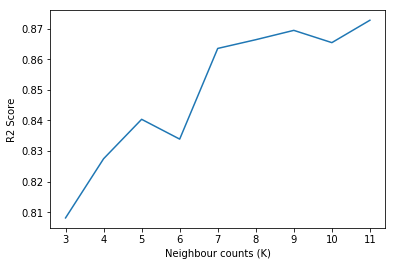

In [68]:
#ploting the r2 scores of 3 of 12 neighbour knn regression

plt.plot(r2_scores)

plt.xlabel("Neighbour counts (K)")

plt.ylabel("R2 Score")

plt.xticks(range(9), range(3,12))

plt.show()

3. KNN Classification: Region is the output column and everything else is the X. Do you now need to label encode or one hot encode the region column? I need the accuracy score. Like the earlier KNN Regressor, plot a graph with the number of neighbors on the X axis and the accuracies on the Y axis

In [113]:
df5 = df.copy()

df5['Region'] = le.fit_transform(df5['Region'])

y = df5['Region']

# scalar = MinMaxScaler()

# col_list = list(df5)

# df5 = pd.DataFrame(scalar.fit_transform(df5))

# df5.columns = col_list

X = df5.drop(['Region'],1)

accuracy_scores = []

for i in range(3,12):
    
    knn = KNeighborsClassifier(i)
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    
accuracy_scores   
 

[0.19047619047619047,
 0.2619047619047619,
 0.2857142857142857,
 0.30952380952380953,
 0.2619047619047619,
 0.23809523809523808,
 0.2857142857142857,
 0.23809523809523808,
 0.38095238095238093]

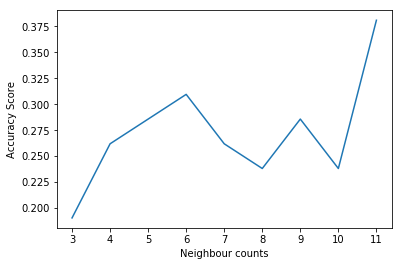

In [118]:
plt.plot(accuracy_scores)

plt.xlabel("Neighbour counts")

plt.ylabel("Accuracy Score")

plt.xticks(range(9), range(3,12))

plt.show()

4. Write down the 5 Assumptions of linear regression in a mark down cell

# Five Assumptions of Linear Regression
### 1. Data points have to be linear
### 2. Every variable has to be correlated with output variable but cannot be correlated with each other
### 3. Homoscedasticity i.e. the error between all the variables is same throughout
### 4. Normal distribution of Residuals

In [95]:
X = df.drop(['life', 'Region'], 1)

y = df['life']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

r2_score(y_test, y_pred)

0.8380468731430133

### With life being the y column, create a multiple linear regression model with

#### a.Linear Regression with Pearson Correlation heatmap
I would typically need the features which should return the features which have a more than 0.6 or a less than -0.6 correlation with the output.


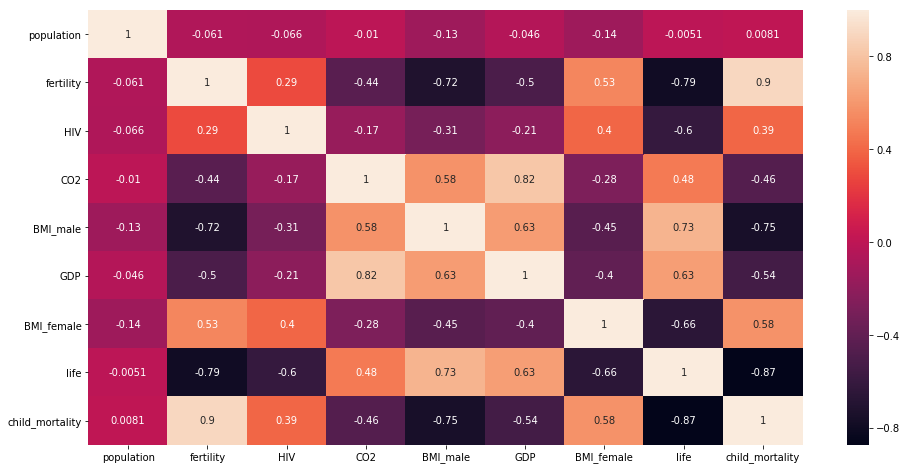

In [100]:
df_lin = df.drop(['Region'], 1)

plt.figure(figsize=(16,8))

sns.heatmap(df_lin.corr(), annot=True)

In [102]:
# initial_features = ['fertility','HIV','BMI_male','GDP','BMI_female','child_mortality']

# eliminating column which correlate to each other
features = ['HIV', 'GDP', 'BMI_female', 'child_mortality']

X = df_lin[features]

y = df_lin['life'] 

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state = 42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_lin_pred = lin_reg.predict(X_test)

r2_score(y_test, y_lin_pred)

0.8148964093063926

#### b.Linear Regression with Statsmodel

In [103]:
X = df_lin.drop(['life'], 1)

y = df_lin['life']

X = sm.add_constant(X)

model_1 = sm.OLS(y,X).fit()

model_1.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     142.8
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.48e-60
Time:                        23:39:36   Log-Likelihood:                -345.49
No. Observations:                 139   AIC:                             709.0
Df Residuals:                     130   BIC:                             735.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              98.2083     10.759      9.128      0.000      76.922     119.494
population      -1.581e-09   2.49e-09     -0.636      0.526    -6.5e-09    3.34e-09
fertility          -0.4555      0.384     -1.188      0.237      -1.214       0.303
HIV                -0.5991      0.066     -9.074      0.000      -0.730      -0.468
CO2                -0.2041      0.074     -2.761      0.007      -0.350      -0.058
BMI_male            0.3324      0.200      1.659      0.100      -0.064       0.729
GDP                 0.0001   2.56e-05      5.448      0.000    8.87e-05       0.000
BMI_female         -0.2485      0.074     -3.338      0.001      -0.396      -0.101
child_mortality    -0.0919      0.015     -6.173      0.000      -0.121      -0.062
==============================================================================
Omnibus:                        7.456   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.236
Skew:                          -0.385   Prob(JB):                       0.0163
Kurtosis:                       3.911   Cond. No.                     4.85e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# step by step eliminating columns whose p>|t| is more than 0.05

X = df_lin.drop(['life', 'population'], 1)

y = df_lin['life']

X = sm.add_constant(X)

model_2 = sm.OLS(y,X).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.36e-61
Time:                        23:41:05   Log-Likelihood:                -345.71
No. Observations:                 139   AIC:                             707.4
Df Residuals:                     131   BIC:                             730.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              96.3158     10.316      9.337      0.000      75.909     116.723
fertility          -0.4067      0.375     -1.085      0.280      -1.148       0.335
HIV                -0.5958      0.066     -9.072      0.000      -0.726      -0.466
CO2                -0.2088      0.073     -2.845      0.005      -0.354      -0.064
BMI_male            0.3621      0.194      1.862      0.065      -0.023       0.747
GDP                 0.0001   2.54e-05      5.510      0.000    8.99e-05       0.000
BMI_female         -0.2405      0.073     -3.285      0.001      -0.385      -0.096
child_mortality    -0.0930      0.015     -6.311      0.000      -0.122      -0.064
==============================================================================
Omnibus:                        6.734   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.244
Skew:                          -0.360   Prob(JB):                       0.0267
Kurtosis:                       3.856   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
X = df_lin.drop(['life', 'population','fertility'], 1)

y = df_lin['life']

X = sm.add_constant(X)

model_2 = sm.OLS(y,X).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     190.7
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.69e-62
Time:                        23:41:59   Log-Likelihood:                -346.33
No. Observations:                 139   AIC:                             706.7
Df Residuals:                     132   BIC:                             727.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              95.4596     10.292      9.275      0.000      75.100     115.819
HIV                -0.5836      0.065     -9.013      0.000      -0.712      -0.456
CO2                -0.2050      0.073     -2.794      0.006      -0.350      -0.060
BMI_male            0.3902      0.193      2.023      0.045       0.009       0.772
GDP                 0.0001   2.54e-05      5.454      0.000    8.84e-05       0.000
BMI_female         -0.2446      0.073     -3.343      0.001      -0.389      -0.100
child_mortality    -0.1053      0.009    -11.155      0.000      -0.124      -0.087
==============================================================================
Omnibus:                        6.880   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.887
Skew:                          -0.336   Prob(JB):                       0.0194
Kurtosis:                       3.955   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c.Linear Regression with Recursive Feature Elimination

In [112]:
X = df_lin.drop(['life'],1)

y = df_lin["life"]

rfe_reg = LinearRegression()

rfe = RFE(rfe_reg, 4)

fit = rfe.fit(X, y)

print("Features list: %s" % list(X))

print("Num Features: %s" % (fit.n_features_))

print("Selected Features: %s" % (fit.support_))

print("Feature Ranking: %s" % (fit.ranking_))

Features list: ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']
Num Features: 4
Selected Features: [False  True  True False  True False  True False]
Feature Ranking: [5 1 1 3 1 4 1 2]
